<a href="https://colab.research.google.com/github/jsAiyaya/JSC270_Data_Science_1/blob/main/Lab2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __JSC270 - Tutorial 2: Exploratory Data Analysis (EDA)__

Welcome to Lab 2! Today, we'll cover a bit more `pandas` in the context of the variable types you learned in class (ie. numerical vs categorical). We'll also cover data visualization and other methods of EDA. 

# Importing the Cars Dataset
- Last week, we generated our own data to analyze
- For this first portion, we'll use an external dataset on classic cars (1985)
- These data were originally used for a Kaggle competition (see [here](https://www.kaggle.com/toramky/automobile-dataset?select=Automobile_data.csv) for details)
- The csv file is posted in the [tutorial section](https://jsc270.github.io/tut_docs.html) of the website

__Before you start, please download the CSV file to your local drive__ (doesn't matter where, as long as you remember the location).
- You'll have to extract the contents from the zip file

Google Colab makes it very easy to interact with your local computer to upload data, without having to run code outside your browser.
- Run the following cell to upload your CSV file into Colab's memory
- You'll see a `Browse...` icon that you can click to find your file
- If you placed the downloaded file deep in your file tree, you may have to click a few times to get it

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving automobile_data.csv to automobile_data (3).csv


You should see a message 'Saving `_filename_ to _filename_' once the upload is finished.

- All we have to do now is assign the dataset in memory to a pandas df we can work with. 
- To do this, we'll use colab's own `io` module.

In [ ]:
import io
import pandas as pd
# Note that this is a true CSV file (comma delimited)
data = pd.read_csv(io.BytesIO(uploaded['automobile_data.csv']), sep = ',')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
# also check the last few rows
data.tail(3) # adding '3' will display the last 3 rows

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [ ]:
data.shape # data dimension (n x p)

(205, 26)

We can see here, there are a number of different types of variables in this set.
- Some are __categorical__ (e.g. body-style, engine-location, make), while others are __numerical__ (e.g. length, width, etc..)



##__Q: Can you find an example of a__ ___discrete___ __numerical variable?__ 

Please type your answer into the chat.

</br>

In [ ]:
# Some variables that are ``rounded'' include city-mpg, highway-mpg, horsepower, peak rpm
# Continuous numerical variables include height, width, length
# data.info() can also help us

# Basic data exploration and preparation

Applying the `list` function to a pandas df will show you the column names:

In [ ]:
list(data)

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [ ]:
# We can also use data.columns 
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

We can use some of the pandas methods learned last week to get more information.

In [ ]:
# Print summary statistics
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
# Print basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

- Notice the different `dtypes` among different columns.
- Pandas typically uses the `object` dtype to denote categorical (non-numerical)
variables
- Notice there are no missing values (but is this true?)

- Sometimes authors of datasets use their own special characters to denote absence of observation
- In this case, the author has chosen to use `?` to denote missing or unreadable data.

To see the relative frequencies of different levels of a categorical variable, we can use the pandas `value_counts` method:

In [ ]:
data.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
alfa-romero       3
chevrolet         3
renault           2
mercury           1
Name: make, dtype: int64

This method is also very useful for identifying special characters in numeric variables, since pandas lists characters before numbers.

In [ ]:
data.price.value_counts()
# Note 187 unique entries (so 205 - 187 = 18 are duplicates or missing)

?        4
16500    2
7957     2
7609     2
13499    2
        ..
7349     1
36880    1
8249     1
11850    1
8949     1
Name: price, Length: 187, dtype: int64

We can see that the `price` column has 4 missing values

</br>
</br>

## __Q: How many missing values does the `normalized-losses` column have?__ Please type your answer into the chat.

</br>



In [ ]:
data['normalized-losses'].value_counts()
# The value_counts method is sliceable

?      41
161    11
91      8
150     7
128     6
134     6
104     6
65      5
102     5
94      5
74      5
85      5
168     5
95      5
103     5
118     4
148     4
122     4
106     4
93      4
101     3
115     3
154     3
137     3
83      3
125     3
158     2
89      2
145     2
81      2
192     2
110     2
164     2
153     2
197     2
113     2
108     2
87      2
129     2
188     2
194     2
119     2
107     1
121     1
98      1
231     1
186     1
142     1
90      1
78      1
256     1
77      1
Name: normalized-losses, dtype: int64

## __Handling Missing Values__

So how do we handle special characters like `?` ?

- We replace them with python characters designed to indicate a missing value.
- Though there are a few special datatypes that do this, the main one we'll use is called `NaN` (Not a Number).

Pandas has built-in functions to replace characters.


In [ ]:
# The NaN datatype was first released with the numpy package
# It is designed to work well with pandas
import numpy as np

data['normalized-losses'].replace('?', np.NaN)

0      NaN
1      NaN
2      NaN
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

Now let's look at the data again.

In [ ]:
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


What's going on? Didn't we just replace the question marks?

- Most pandas df methods are __pure__, meaning they will not modify an existing dataframe unless you assign them. Usually, a copy is created to output the result. 
- The `replace` method can be used on the entire dataframe. 

In [ ]:
data = data.replace('?', np.nan)
data.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


Let's re-examine the data, just so we know exactly which variables have missing data. 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

</br>
</br>

## __Q: How many variables have missing observations?__ Please type your answer into the chat. (_Hint: We know there should be 205 observations in total. How many variables are missing some non-null entries?_)

</br>

In [ ]:
data.isna().any()

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

In [ ]:
# There are 7 variables with missing values
data.isna().any().sum()

7

The last thing to notice is that, because of the `?` character, pandas has treated some variables that should be numerical as categorical (for instance `price` should obviously be numeric).

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Pandas has methods to change a column's datatype, but apart from manual inspection, there isn't a great way to identify variables with incorrect dtype.

- I've changed the appropriate variables here. __Please run the following code before continuing__. Note that, if missing values are not represented as `NaN`, some of these methods might throw an error.
- Also, some of the computations we'll look at shortly cannot be executed on variables that are not numeric type (`int64`, `float64`, etc..).

In [ ]:
# Convert selected columns to floats
for col in ['price', 'peak-rpm', 'horsepower', 'bore', 'stroke','normalized-losses']:
  data[col] = data[col].astype('float64')

# Descriptive statistics and missing data

- Pandas has several built-in methods for computing basic statistics
- Since these methods only work for numeric data, let's capture the numerical subset of our data

In [ ]:
num_data = data.select_dtypes(include = 'number')
print('The following {} variables are numerical:\n'.format(len(list(num_data))))
list(num_data)
# Note the include argument to the select_dtypes method
# could use category, object, or datetime instead

The following 16 variables are numerical:



['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

We can similarly capture the remaining data using the `exclude` argument:

In [ ]:
cat_data = data.select_dtypes(exclude = 'number')
print('The following {} variables are categorical:\n'.format(len(list(cat_data))))
list(cat_data)

The following 10 variables are categorical:



['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In general, you really don't need to split your data by type, in our case, it will make the following analysis more readable.

- Pandas has many summary statistics: `.mean()`, `.std()`,`min()`, `max()`,`count()`,`.quantile()`

In [ ]:
num_data['height'].quantile(q=0.25)

52.0

</br>
</br>

## __Q: What is the median value of `highway-mpg` in our dataset?__ Please post your answer in the chat. 

</br>

In [ ]:
num_data['price'].mean(skipna = True)

13207.129353233831

In [ ]:
num_data['highway-mpg'].median()

30.0

In [ ]:
# How many missing values are there?
num_data.isnull().sum()

symboling             0
normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In this case, if we were to drop rows with missing observations, we could potentially lose almost a third of our data (if there is no overlap among the missing values).

In [ ]:
# How many observations would be left if we dropped all missing data?
no_missing_data = num_data.dropna(axis = 0) # Note axis

print('If we drop rows with missing observatiobs, we will only be left with {} rows.'.format(len(no_missing_data)))

If we drop rows with missing observatiobs, we will only be left with 160 rows.


Simply removing this much data is problematic.
- At a high-level, when you have a smaller data set you have less information about the underlying population where the data came from.  Here, that is the universe of cars in 1985.
- For example, if you aim to build a prediction model using the data, it could be very difficult to obtain a model with high accuracy using such a small data set.  
- If instead you wish to understand relationships between the variables, such as correlation, the estimates you obtain will be less precise (eg. have higher variance).
- On top of this, if the data without missing values is very different from the full data set, then your data is no longer a representative of the underlying population.  A prediction model you develop with this dataset would then not generalize well to new data and estimates of association between variables, such as correlation, would be biased.  
- When you are faced with missing data, you want to think about the goal of your analysis (eg. statisical inference vs prediction) and what you know about the missing data (eg. is missingness: significant in my data? across all variables? informative for the analysis? completely at random, related to the variables in the dataset, or related to other factors that aren't measured?)


In this case, we have one variable, `normalized-losses`, with a signficiant amount of missingness.  The simplest option is to drop this variable from further analysis.  


## Q: __When would it make sense to drop the normalized losses column? When would it not make sense?__ ## 

FYI: Normalized loss is relative average loss payment per insured vehicle per year. It is normalized for all cars within a particular size classification (two-door, small, station wagons, sports/specialty, etc). 


In [ ]:
# Ultimately, it depends what the goal of the analysis is and what you know about the data and how it is missing. 

# Predication Example:
# If for example, you are building a prediction model for the cost of a car and normalized losses isn't related to the make then it might be ok to drop it.

# If normalized losses is very important to predict the cost of the car and not related to other available features, then it would be impossible to build an accurate prediction model for cost.
# In this case you could consider an appropriate imputation approach.  If you expect the values to be missing randomly, then imputing them with the mean would be a reasonable approach.

# Statisical Inference Example:
# It also wouldn't be a great idea to drop normalized losses if you wanted to understand the association between normalized loss on the cost of the car and you were missing all of the low values on normalized loss.
# In this case, imputing the values with the mean wouldn't be a good approach since the values that are missing are lower than those that aren't missing in the data.  
# A more advanced missing data approach would be needed. 


If it is reasonable to substitute missing values with the mean value, then the code below will perform the imputation.  You could use the same code to impute with the median. 

In [ ]:
# Impute missing obs with mean of column
num_data_impute = num_data.fillna(num_data.mean())  # num_data_impute = num_data.fillna(num_data.median())

For lab today, we will go ahead and drop the `normalized-losses` variable for the rest of our exploratory analysis. 

In [ ]:
num_data = num_data.drop(['normalized-losses'], axis = 1)

<br>
<br>

# Outlier detection and visualization

<br>

How do we detect outliers?
- One way is to simply plot the variables

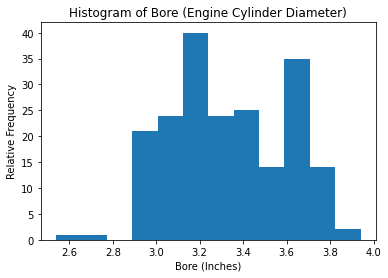

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of bore
plt.hist(num_data.bore, bins = 12)
plt.title('Histogram of Bore (Engine Cylinder Diameter)')
plt.xlabel('Bore (Inches)')
plt.ylabel('Relative Frequency')
plt.show()


But this can be very imprecise, and difficult to see visually for small samples.

One of the classic methods (as mentioned in lecture) is to consider anything beyond 1.5*IQR an outlier.  We can identify outliers visually with this method using a boxplot.

This rule was first proposed by John Tukey in his EDA book published in 1977.  Datasets were much slower back then.  The rule works best for symmetric distrubtions.  For instance, when you have a normal distribution, the 1.5 IQR rule will identify observations ~3 standard deviations from the mean/median, which are quite rare.  In class, we saw an example of a skewed distribution where this outlier identification method is not very useful.



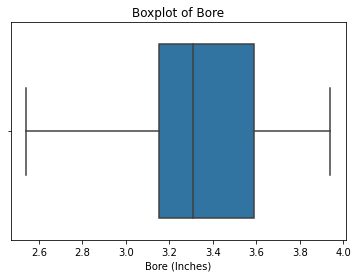

In [ ]:
# Generate boxplot
import seaborn as sns

sns.boxplot(x = 'bore', data = num_data)
plt.xlabel('Bore (Inches)')
plt.title('Boxplot of Bore')
plt.show()

Or we can just extract these values directly.  Don't worry, this function is not as scary as it looks.

In [ ]:
def get_outliers(num_var, df):
  '''Get outliers based on the 1.5*IQR rule.
  Input - num_var: A string representing the v
  variable of interest
  df: The pd df containing the numerical data
  Output: A pd df containing the outlier obs
  '''
  # Capture 1st and 3rd quartiles
  firstquart = df[num_var].quantile(q=0.25)
  thirdquart = df[num_var].quantile(q=0.75)

  # Generate IQR
  iqr = thirdquart - firstquart

  # Generate the boundary for an outlier (ie. the whiskers of the plot)
  lower_whisker = firstquart - 1.5*iqr
  upper_whisker = thirdquart + 1.5*iqr

  # Gen outlier df
  outliers = df[(df[num_var] > upper_whisker) | (df[num_var] < lower_whisker)]
  print('The variable {} has {} outliers'.format(num_var, len(outliers)))
  return outliers

get_outliers('bore', num_data)


The variable bore has 0 outliers


,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price



<br>
<br>

## __Q: How many outliers does `width` have?__ You can use either the plot or the function to get your answer. Please type your response in the chat.

<br>

In [ ]:
get_outliers('width', num_data)
# Note that this output is iterable (you can slice it)

The variable width has 8 outliers


,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
6,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
70,-1,115.6,202.6,71.7,56.3,3770,183,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0
71,-1,115.6,202.6,71.7,56.5,3740,234,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0
73,0,120.9,208.1,71.7,56.7,3900,308,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0
74,1,112.0,199.2,72.0,55.4,3715,304,3.80,3.35,8.0,184.0,4500.0,14,16,45400.0
129,1,98.4,175.7,72.3,50.5,3366,203,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


After identifying outlier points, we may want to impute or remove them.


In [ ]:
# save these results
outliers = get_outliers('width', num_data)
print(outliers.index)

# Replace the outlier values with the median of that variable
num_data['width'].loc[outliers.index] = num_data['width'].median()

outliers2 = get_outliers('width',num_data)
print(outliers2.index)
# Now, no outliers
num_data.loc[60:80]

The variable width has 0 outliers
Int64Index([], dtype='int64')
The variable width has 0 outliers
Int64Index([], dtype='int64')


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
60,0,98.8,177.8,66.5,55.5,2410,122,3.39,3.39,8.6,84.0,4800.0,26,32,8495.0
61,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0
62,0,98.8,177.8,66.5,55.5,2410,122,3.39,3.39,8.6,84.0,4800.0,26,32,10245.0
63,0,98.8,177.8,66.5,55.5,2443,122,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
64,0,98.8,177.8,66.5,55.5,2425,122,3.39,3.39,8.6,84.0,4800.0,26,32,11245.0
65,0,104.9,175.0,66.1,54.4,2670,140,3.76,3.16,8.0,120.0,5000.0,19,27,18280.0
66,0,104.9,175.0,66.1,54.4,2700,134,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0
67,-1,110.0,190.9,65.5,56.5,3515,183,3.58,3.64,21.5,123.0,4350.0,22,25,25552.0
68,-1,110.0,190.9,65.5,58.7,3750,183,3.58,3.64,21.5,123.0,4350.0,22,25,28248.0
69,0,106.7,187.5,65.5,54.9,3495,183,3.58,3.64,21.5,123.0,4350.0,22,25,28176.0


As mentioned above, this method of outlier detection can be a bit misleading for some data.

Consider the box and whisker plot of `price`:

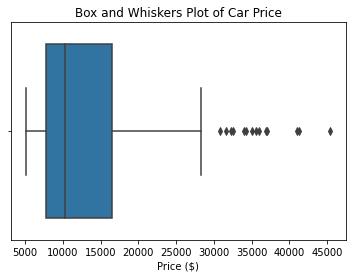

In [ ]:
# Boxplot of Price

sns.boxplot(x = 'price', data = num_data)
plt.xlabel('Price ($)')
plt.title('Box and Whiskers Plot of Car Price')
plt.show()


<br>
<br>

## __Q: Are there outliers in the `price` variable?__ (Y/N). Please type your answer into the chat.

<br>

In [ ]:
# Depending on the situation, an observation formally considered an outlier may want to be kept.  
# In this setting, we have a skewed distribution and none of these prices seem outrageous.  We would keep them.

## Plotting Categorical Variables

- Depending on the number of categories, your best option is likely a simple bar plot.



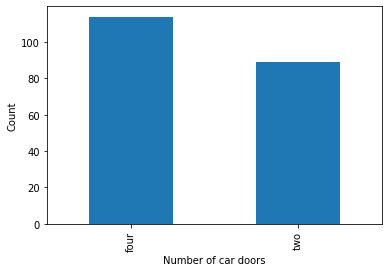

In [ ]:
cat_data['num-of-doors'].value_counts().plot(kind = 'bar')
plt.xlabel('Number of car doors')
plt.ylabel('Count')
plt.show()


## Preparing for Model-Building
- When we're interested in building a model (which you'll do in a few weeks),
we may want to examine relationships between our features
- A simple way of doing this (for numerical data) is by examining __correlation__
- Correlation is a value between -1 and 1 that measures the strength of the linear relationship between two variables

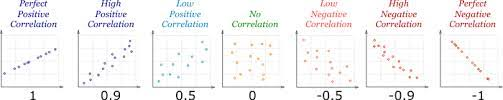


In [ ]:
num_data.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,-0.531954,-0.357612,-0.228124,-0.541038,-0.227691,-0.105790,-0.134205,-0.008965,-0.178515,0.071622,0.274573,-0.035823,0.034606,-0.082391
wheel-base,-0.531954,1.000000,0.874587,0.697914,0.589435,0.776386,0.569329,0.490378,0.161477,0.249786,0.352297,-0.361052,-0.470414,-0.544082,0.584642
length,-0.357612,0.874587,1.000000,0.767383,0.491029,0.877728,0.683360,0.607480,0.129739,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.690628
width,-0.228124,0.697914,0.767383,1.000000,0.247624,0.807316,0.620090,0.570170,0.181890,0.215801,0.562081,-0.238694,-0.601433,-0.629256,0.616645
height,-0.541038,0.589435,0.491029,0.247624,1.000000,0.295572,0.067149,0.176195,-0.056999,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.135486
curb-weight,-0.227691,0.776386,0.877728,0.807316,0.295572,1.000000,0.850594,0.649045,0.168929,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.834415
engine-size,-0.105790,0.569329,0.683360,0.620090,0.067149,0.850594,1.000000,0.594090,0.206675,0.028971,0.810773,-0.244618,-0.653658,-0.677470,0.872335
bore,-0.134205,0.490378,0.607480,0.570170,0.176195,0.649045,0.594090,1.000000,-0.055909,0.005203,0.577273,-0.264269,-0.594584,-0.594572,0.543436
stroke,-0.008965,0.161477,0.129739,0.181890,-0.056999,0.168929,0.206675,-0.055909,1.000000,0.186170,0.090254,-0.071493,-0.042906,-0.044528,0.082310
compression-ratio,-0.178515,0.249786,0.158414,0.215801,0.261214,0.151362,0.028971,0.005203,0.186170,1.000000,-0.205874,-0.436221,0.324701,0.265201,0.071107


This gives us the correlation matrix of our columns. Note:
- The matrix will be symmetric (by definition, Corr(A, B) = Corr (B, A))
- The diagonal of the matrix will contain only values of 1 (Corr(A, A) = Corr(B, B) = 1)
- This can be a very useful diagnostic tool to check redundancy.

<br>

For categorical variables, correlation is not useful. We can also look at pairwise plots (for numerical data) too:

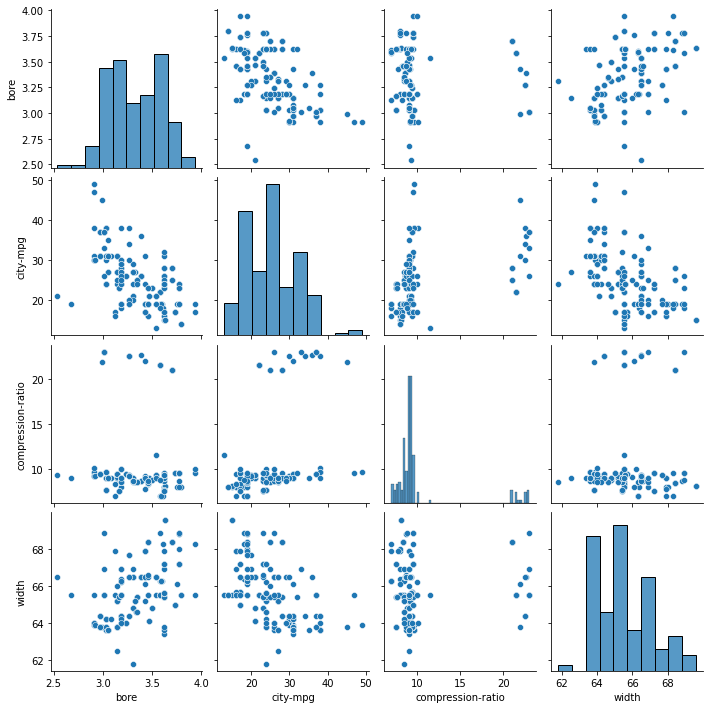

In [ ]:
import seaborn as sns
sns.pairplot(num_data[['bore', 'city-mpg', 'compression-ratio', 'width']])
plt.show()